In [1]:
#Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Upload file
uploaded_file = files.upload()
for fn in uploaded_file.keys():
  print('Your uploaded file:', fn)

#Load the dataset
file_name = ("Test2_dataset.xlsx")
df = pd.read_excel(file_name)

#Display the first few rows
print(df.head())

Saving Test2_dataset.xlsx to Test2_dataset (3).xlsx
Your uploaded file: Test2_dataset (3).xlsx
             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0     

In [3]:
#Print the dataset's columns
print(df.columns)

#Get column types
column_dtypes = df.dtypes

# Print the results, make sure types match with data
print(column_dtypes)

Index(['Catalyst', 'Ratio of CH4 in Feed', 'Reaction Temperature',
       'Ni Loading', 'Reaction Time', 'Pore Size', 'Pore Volume',
       'Surface Area', 'H2-TPR Peak Temperature', 'Ni Particle Size',
       'Ni Dispersion', 'Modifier Electronegativity', 'GHSV', 'CH4 Conversion',
       'CO2 Conversion', 'Syngas_Ratio'],
      dtype='object')
Catalyst                       object
Ratio of CH4 in Feed          float64
Reaction Temperature            int64
Ni Loading                    float64
Reaction Time                 float64
Pore Size                     float64
Pore Volume                   float64
Surface Area                  float64
H2-TPR Peak Temperature       float64
Ni Particle Size              float64
Ni Dispersion                 float64
Modifier Electronegativity    float64
GHSV                            int64
CH4 Conversion                float64
CO2 Conversion                float64
Syngas_Ratio                  float64
dtype: object


In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

Catalyst                      0
Ratio of CH4 in Feed          0
Reaction Temperature          0
Ni Loading                    0
Reaction Time                 0
Pore Size                     0
Pore Volume                   0
Surface Area                  0
H2-TPR Peak Temperature       0
Ni Particle Size              0
Ni Dispersion                 0
Modifier Electronegativity    0
GHSV                          0
CH4 Conversion                0
CO2 Conversion                0
Syngas_Ratio                  0
dtype: int64


In [5]:
# Isolate numerical columns
numbersdf = df.select_dtypes(include=np.number)

#Drop columns with missing data
numbersdf = numbersdf.dropna()

#Recombine cleaned numbersdf with df
df = df[df.index.isin(numbersdf.index)]

In [7]:
# One-hot encode the 'Catalyst' column
df_encoded = pd.get_dummies(df['Catalyst'])

# Combine the original DataFrame with the encoded columns, removing the original location column
df_final = pd.concat([df.drop('Catalyst', axis= 1), df_encoded], axis=1)

print(df_final)

      Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
17                    0.15                   800        4.09          120.0   
18                    0.15                   800        4.68          120.0   
19                    0.15                   800        3.64          120.0   
20                    0.15                   800        4.23          120.0   
21                    0.15                   800        4.09           60.0   
...                    ...                   ...         ...            ...   
1705                  0.50                   750        3.00           40.0   
1706                  0.50                   750        6.00           40.0   
1707                  0.50                   750        3.97           72.0   
1708                  0.50                   750        3.83           72.0   
1709                  0.50                   750        4.24           72.0   

      Pore Size  Pore Volume  Surface Area  H2-TPR 

In [8]:
#Summary stats
df_final.describe()

,Ratio of CH4 in Feed,Reaction Temperature,Ni Loading,Reaction Time,Pore Size,Pore Volume,Surface Area,H2-TPR Peak Temperature,Ni Particle Size,Ni Dispersion,Modifier Electronegativity,GHSV,CH4 Conversion,CO2 Conversion,Syngas_Ratio
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,0.365529,703.888889,9.543805,18.607290,11.094705,0.431652,196.171128,656.206515,12.343822,9.746237,0.414274,52226.936027,60.555931,65.796646,0.796904
std,0.143465,78.283834,5.839814,26.564926,8.772826,0.283013,159.363144,167.005240,10.147710,7.275506,0.594592,56363.132273,25.896419,24.878814,0.190175
min,0.100000,450.000000,0.300000,0.200000,0.510000,0.000000,1.900000,217.000000,0.400000,0.160000,0.000000,3600.000000,0.000000,0.000000,0.000000
25%,0.250000,650.000000,4.932500,1.000000,4.942000,0.170000,85.000000,550.000000,7.000000,4.592500,0.000000,20000.000000,43.007500,50.000000,0.730000
50%,0.400000,700.000000,9.770000,8.000000,7.670000,0.420000,152.000000,700.000000,10.000000,8.900000,0.000000,30000.000000,66.000000,72.210000,0.840000
75%,0.500000,750.000000,10.600000,24.000000,15.193000,0.616000,264.240000,793.900000,14.400000,12.200000,1.120000,50000.000000,82.192500,86.300000,0.925750
max,0.500000,900.000000,30.800000,200.000000,46.130000,1.680000,799.000000,954.000000,85.000000,47.800000,1.880000,275000.000000,99.100000,99.200000,1.500000


In [9]:
#Define a correlation matrix
corr_matrix = df_final.corr()

print("Correlation matrix:", corr_matrix)

Correlation matrix:                       Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
Ratio of CH4 in Feed              1.000000             -0.084455   -0.180540   
Reaction Temperature             -0.084455              1.000000    0.037255   
Ni Loading                       -0.180540              0.037255    1.000000   
Reaction Time                    -0.096231              0.204007   -0.320633   
Pore Size                        -0.101618              0.074394    0.265607   
...                                    ...                   ...         ...   
Y–3%Nd2O3                        -0.019692              0.180552    0.021066   
Y–3.5%Nd2O3                      -0.004449              0.050459    0.004477   
Y–4%Nd2O                         -0.004449              0.050459    0.004618   
Y–Ni/SBA-16-MgO                   0.086432             -0.122374    0.007204   
ZrO2/10Ni/SBA-15                  0.086432             -0.122374    0.007204   

                   

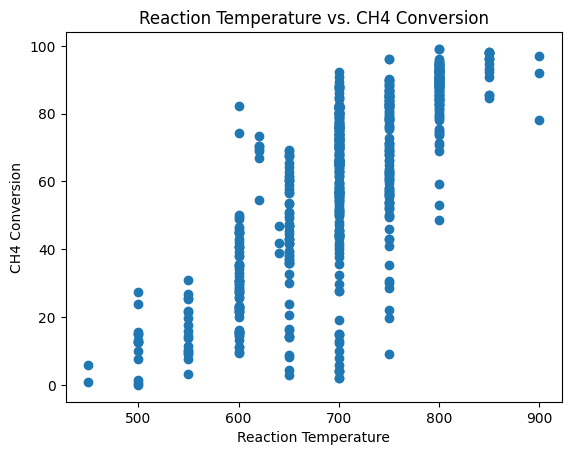

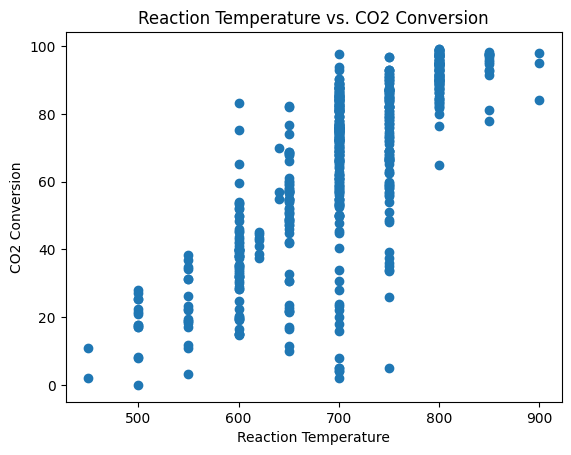

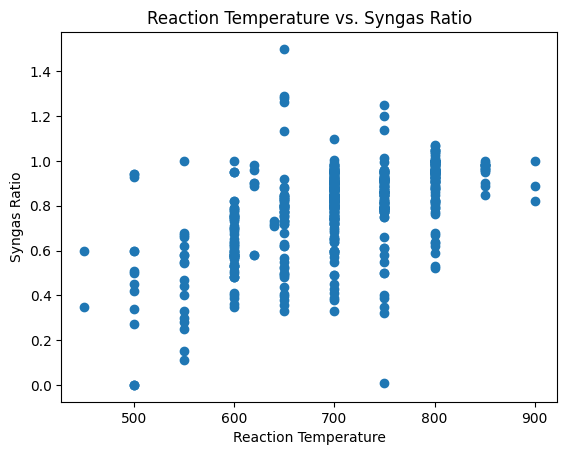

In [10]:
# Visualize the relationships between reaction temperature and targets using a scatter plot
plt.scatter(df_final['Reaction Temperature'], df_final['CH4 Conversion'])
plt.xlabel("Reaction Temperature")
plt.ylabel("CH4 Conversion")
plt.title("Reaction Temperature vs. CH4 Conversion")
plt.show()

plt.scatter(df_final['Reaction Temperature'], df_final['CO2 Conversion'])
plt.xlabel("Reaction Temperature")
plt.ylabel("CO2 Conversion")
plt.title("Reaction Temperature vs. CO2 Conversion")
plt.show()

plt.scatter(df_final['Reaction Temperature'], df_final['Syngas_Ratio'])
plt.xlabel("Reaction Temperature")
plt.ylabel("Syngas Ratio")
plt.title("Reaction Temperature vs. Syngas Ratio")
plt.show()

Reaction temp. generally increases target vars.

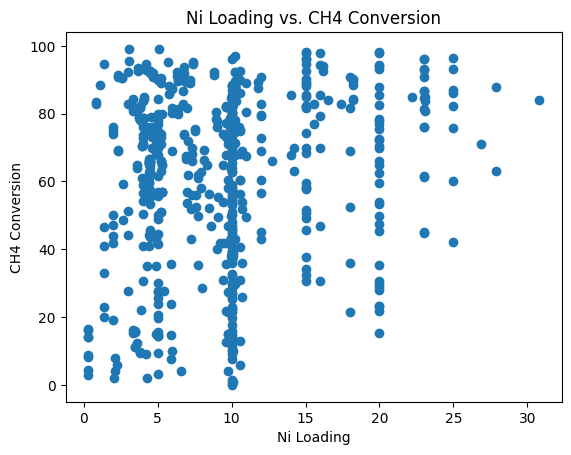

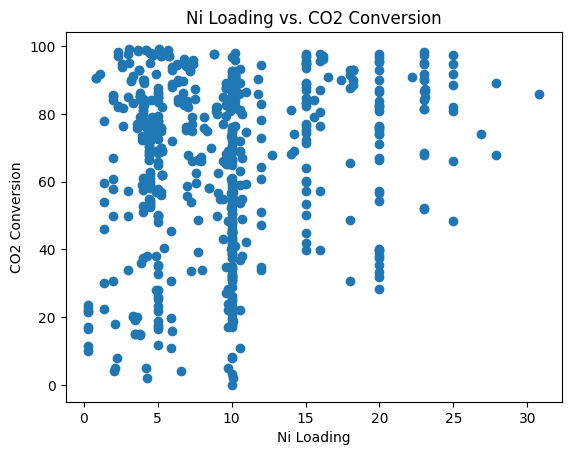

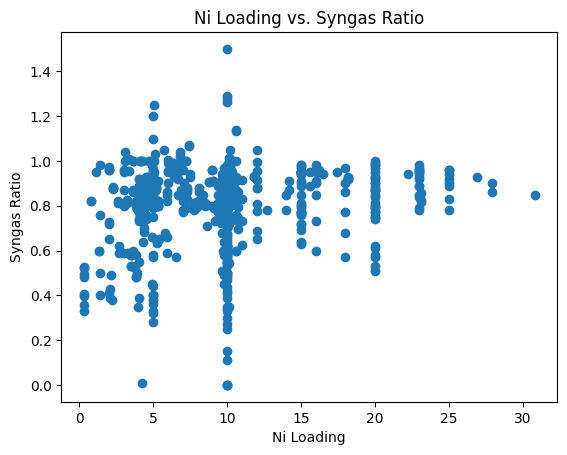

In [11]:
# Visualize the relationships between Ni Loading and targets using a scatter plot
plt.scatter(df_final['Ni Loading'], df_final['CH4 Conversion'])
plt.xlabel("Ni Loading")
plt.ylabel("CH4 Conversion")
plt.title("Ni Loading vs. CH4 Conversion")
plt.show()

plt.scatter(df_final['Ni Loading'], df_final['CO2 Conversion'])
plt.xlabel("Ni Loading")
plt.ylabel("CO2 Conversion")
plt.title("Ni Loading vs. CO2 Conversion")
plt.show()

plt.scatter(df_final['Ni Loading'], df_final['Syngas_Ratio'])
plt.xlabel("Ni Loading")
plt.ylabel("Syngas Ratio")
plt.title("Ni Loading vs. Syngas Ratio")
plt.show()

Weak positive corrs. between Ni loading and CO2, CH4 conversion

No clear correlation between Ni loading and syngas ratio

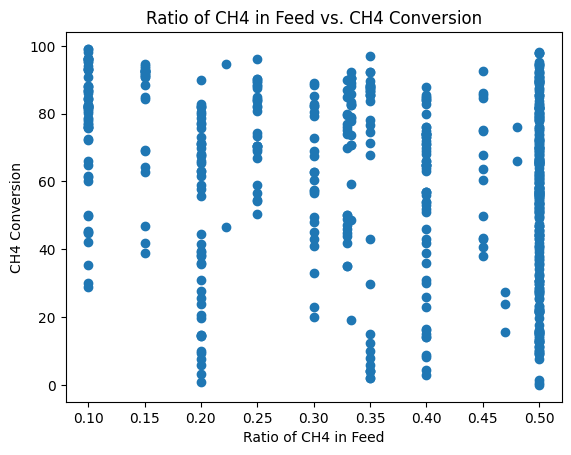

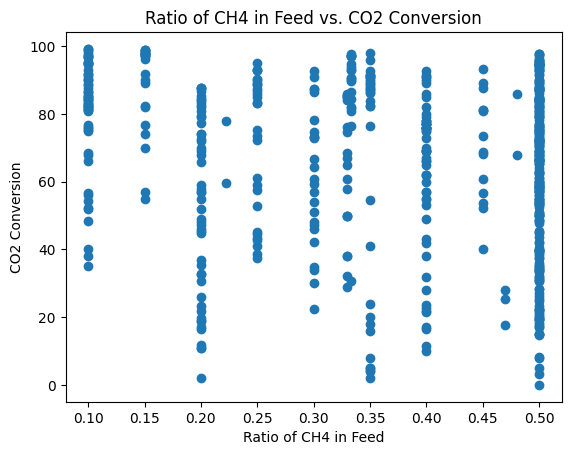

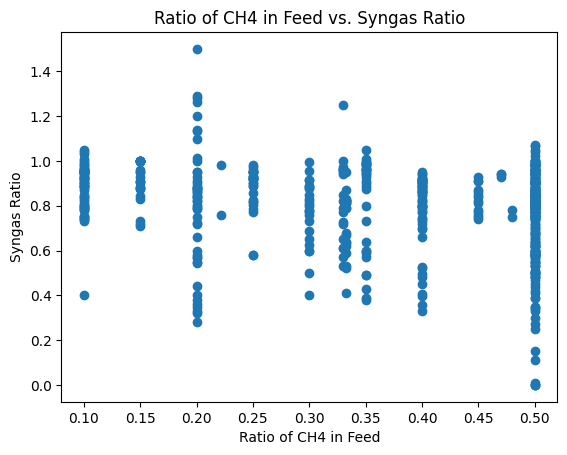

In [12]:
# Visualize the relationships between Ratio of CH4 in Feed and targets using a scatter plot
plt.scatter(df_final['Ratio of CH4 in Feed'], df_final['CH4 Conversion'])
plt.xlabel("Ratio of CH4 in Feed")
plt.ylabel("CH4 Conversion")
plt.title("Ratio of CH4 in Feed vs. CH4 Conversion")
plt.show()

plt.scatter(df_final['Ratio of CH4 in Feed'], df_final['CO2 Conversion'])
plt.xlabel("Ratio of CH4 in Feed")
plt.ylabel("CO2 Conversion")
plt.title("Ratio of CH4 in Feed vs. CO2 Conversion")
plt.show()

plt.scatter(df_final['Ratio of CH4 in Feed'], df_final['Syngas_Ratio'])
plt.xlabel("Ratio of CH4 in Feed")
plt.ylabel("Syngas Ratio")
plt.title("Ratio of CH4 in Feed vs. Syngas Ratio")
plt.show()

No clear corr. between CH4 ratio in feed and target vars.

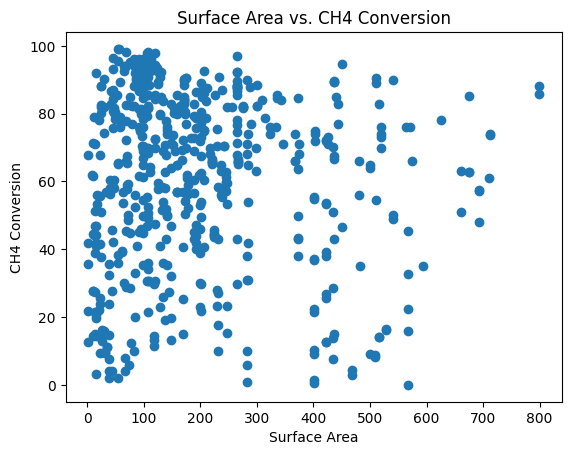

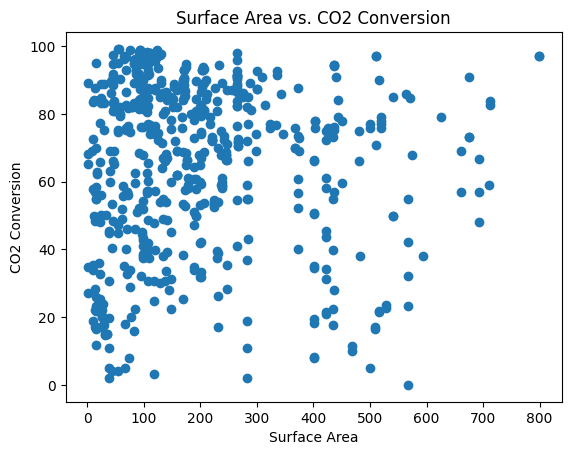

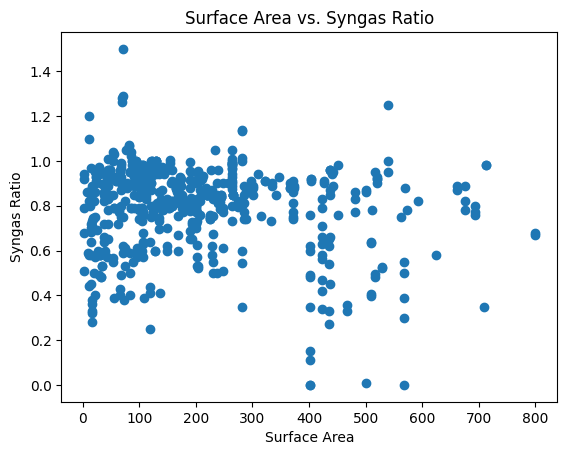

In [13]:
# Visualize the relationships between Surface Area and targets using a scatter plot
plt.scatter(df_final['Surface Area'], df_final['CH4 Conversion'])
plt.xlabel("Surface Area")
plt.ylabel("CH4 Conversion")
plt.title("Surface Area vs. CH4 Conversion")
plt.show()

plt.scatter(df_final['Surface Area'], df_final['CO2 Conversion'])
plt.xlabel("Surface Area")
plt.ylabel("CO2 Conversion")
plt.title("Surface Area vs. CO2 Conversion")
plt.show()

plt.scatter(df_final['Surface Area'], df_final['Syngas_Ratio'])
plt.xlabel("Surface Area")
plt.ylabel("Syngas Ratio")
plt.title("Surface Area vs. Syngas Ratio")
plt.show()

No clear corr. between surface area and target vars.

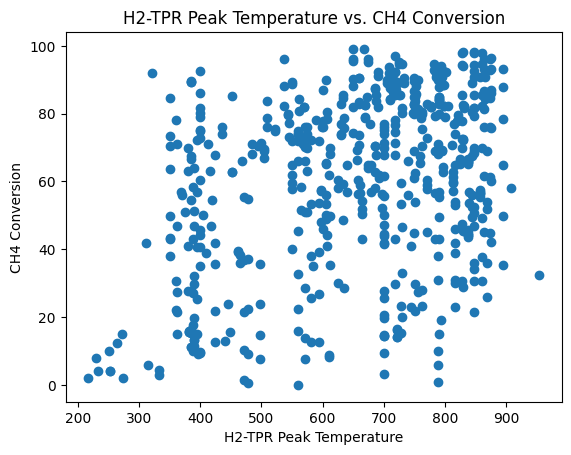

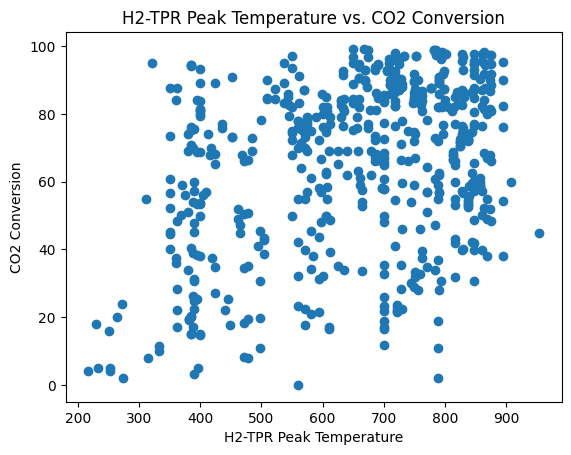

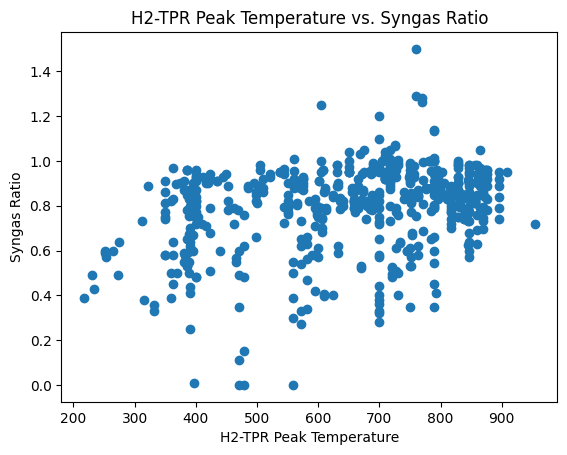

In [15]:
# Visualize the relationships between H2-TPR Peak Temperature and targets using a scatter plot
plt.scatter(df_final['H2-TPR Peak Temperature'], df_final['CH4 Conversion'])
plt.xlabel("H2-TPR Peak Temperature")
plt.ylabel("CH4 Conversion")
plt.title("H2-TPR Peak Temperature vs. CH4 Conversion")
plt.show()

plt.scatter(df_final['H2-TPR Peak Temperature'], df_final['CO2 Conversion'])
plt.xlabel("H2-TPR Peak Temperature")
plt.ylabel("CO2 Conversion")
plt.title("H2-TPR Peak Temperature vs. CO2 Conversion")
plt.show()

plt.scatter(df_final['H2-TPR Peak Temperature'], df_final['Syngas_Ratio'])
plt.xlabel("H2-TPR Peak Temperature")
plt.ylabel("Syngas Ratio")
plt.title("H2-TPR Peak Temperature vs. Syngas Ratio")
plt.show()

No clear correlations between H2-TPR Peak Temp. and target vars.

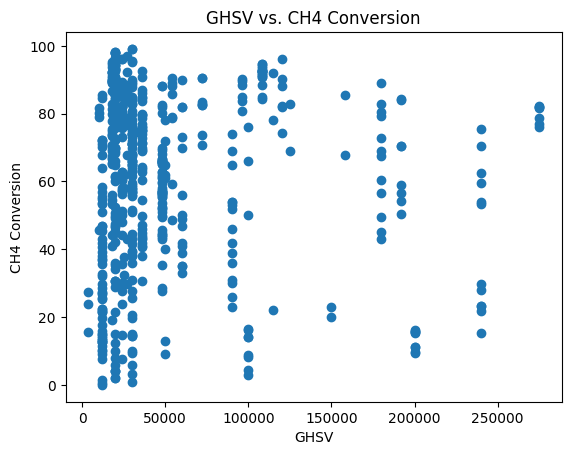

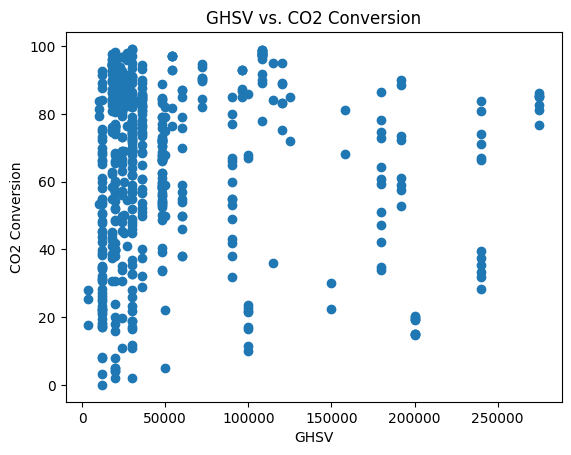

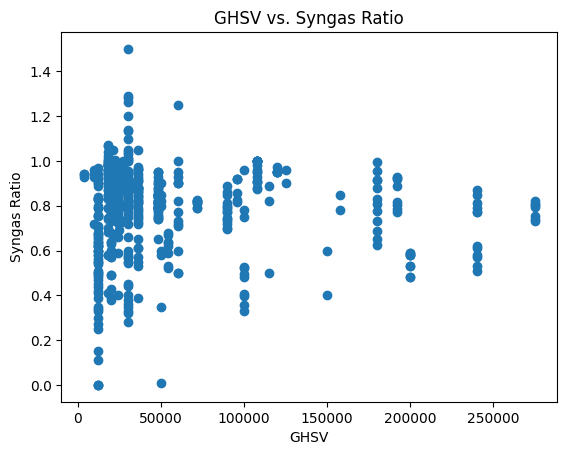

In [ ]:
# Visualize the relationships between GHSV and targets using a scatter plot
plt.scatter(df_final['GHSV'], df_final['CH4 Conversion'])
plt.xlabel("GHSV")
plt.ylabel("CH4 Conversion")
plt.title("GHSV vs. CH4 Conversion")
plt.show()

plt.scatter(df_final['GHSV'], df_final['CO2 Conversion'])
plt.xlabel("GHSV")
plt.ylabel("CO2 Conversion")
plt.title("GHSV vs. CO2 Conversion")
plt.show()

plt.scatter(df_final['GHSV'], df_final['Syngas_Ratio'])
plt.xlabel("GHSV")
plt.ylabel("Syngas Ratio")
plt.title("GHSV vs. Syngas Ratio")
plt.show()

No clear corr. between GHSV and target vars.